In [6]:
import os
import sys
import gin
from IPython.core.display import clear_output, display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df, get_pd_line_graph, \
    apply_nodes_restrictions
from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical


import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from prepare import parse

csv_params = {
"sep": '\s+',
"nrows": 15000,
"encoding": 'utf-8',
"names": ['event',  'x', 'y', 'z', 'station', 'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0']
}
suff_df = ('_p', '_c')
gin.bind_parameter('get_pd_line_graph.restrictions_0',[-1000.18, 1000.18])
gin.bind_parameter('get_pd_line_graph.restrictions_1', [-1000.15, 1000.15])
gin.bind_parameter('get_pd_line_graph.suffix_c', '_c')
gin.bind_parameter('get_pd_line_graph.suffix_p','_p')
gin.bind_parameter('get_supernodes_df.suffix_c', '_c')
gin.bind_parameter('get_supernodes_df.suffix_p', '_p')
gin.bind_parameter('get_supernodes_df.axes', ['r', 'phi', 'z'])
gin.bind_parameter('apply_edge_restriction.edge_restriction', 100000.73)
stations_constraints = {
    0: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    1: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    2: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
}


In [3]:
events = parse("/zfs/hybrilit.jinr.ru/user/p/pgonchar/data/bes3/events/1.txt", csv_params=csv_params, events_quantity='0..20000')
events = next(events)[0]
n_events = 20000
events_to_analyze = events[events.event < n_events]

In [43]:
import numpy as np

In [65]:
amounts={}
events_to_analyze = pd.DataFrame()
max_amount=100
i = 0
for data_df, basename in parse("/zfs/hybrilit.jinr.ru/user/p/pgonchar/data/bes3/events/*.txt", 
                               csv_params=csv_params, events_quantity=':'):
    print('got %s %d' % (basename, i))
    i+=1
    data_df['mult'] = 0
    for ev_id, event in data_df.groupby('event'):
        data_df.loc[data_df.event == ev_id, 'mult'] = event.track[event.track != -1].nunique()
    for mult, multi in data_df.groupby('mult'):        

        uni_events = multi.event.unique()
        
        col = amounts[mult] if mult in amounts else 0
        elems_count = min(max_amount - col, len(uni_events))
        #elems_count = max_amount if max_amount <  else len(uni_events)
        
        if col < max_amount:
            amounts[mult] = col + elems_count
        else:
            continue
        to_select = uni_events[:elems_count]
        selected = multi[multi.event.isin(to_select)]

        if not events_to_analyze.empty:
            tricky = selected[selected.event.isin(events_to_analyze.event)]
            count_of_tricky = len(tricky)
            while count_of_tricky > 0:                
                for ev in tricky.event.unique():
                    selected.loc[selected.event.isin(events_to_analyze.event) & 
                                 (selected.event == ev), 'event'] = np.random.randint(1, 1e6, size=1)[0]
                tricky = selected[selected.event.isin(events_to_analyze.event)]
                count_of_tricky = len(tricky)

            events_to_analyze = events_to_analyze.append(selected, ignore_index=True)
        else:
            events_to_analyze = events_to_analyze.append(selected, ignore_index=True)

print(amounts)
for mult, multi in events_to_analyze.groupby('mult'): 
    print(mult, multi.event.nunique())

got 404.txt
got 372.txt
got 67.txt
got 190.txt
got 5.txt
got 256.txt
got 287.txt
got 520.txt
got 141.txt
got 478.txt
got 197.txt
got 60.txt
got 2.txt
got 251.txt
got 527.txt
got 280.txt
got 146.txt
got 309.txt
got 403.txt
got 375.txt
got 199.txt
got 529.txt
got 148.txt
got 471.txt
got 307.txt
got 12.txt
got 223.txt
got 584.txt
got 555.txt
got 134.txt
got 15.txt
got 583.txt
got 224.txt
got 552.txt
got 133.txt
got 69.txt
got 258.txt
got 289.txt
got 476.txt
got 300.txt
got 106.txt
got 567.txt
got 211.txt
got 20.txt
got 349.txt
got 398.txt
got 492.txt
got 335.txt
got 443.txt
got 332.txt
got 495.txt
got 444.txt
got 101.txt
got 560.txt
got 216.txt
got 27.txt
got 438.txt
got 84.txt
got 264.txt
got 218.txt
got 29.txt
got 340.txt
got 436.txt
got 391.txt
got 108.txt
got 569.txt
got 347.txt
got 396.txt
got 431.txt
got 174.txt
got 83.txt
got 263.txt
got 52.txt
got 420.txt
got 387.txt
got 356.txt
got 119.txt
got 578.txt
got 272.txt
got 43.txt
got 92.txt
got 165.txt
got 504.txt
got 275.txt
got 44.tx

In [66]:
events_to_analyze

,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0,mult
0,4,-6.303836,-81.31101,-196.08430,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,4,93.135390,84.94505,122.66250,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,4,-15.865770,-125.05260,137.41190,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,4,118.809800,116.72540,130.59160,2,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
4,4,-25.710850,-164.55860,225.72060,2,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88771,271814,-166.542000,2.08293,-24.52774,2,24,-0.355584,0.035751,-0.061284,0.540280,-0.349776,0.513922,11
88772,271814,13.893540,-80.36285,38.08114,0,25,0.027819,-0.150642,0.068751,0.540280,-0.349776,0.513922,11
88773,271814,13.694590,-125.30890,60.67636,1,25,0.027819,-0.150642,0.068751,0.540280,-0.349776,0.513922,11
88774,271814,10.446930,-166.22700,78.99410,2,25,0.027819,-0.150642,0.068751,0.540280,-0.349776,0.513922,11


In [4]:
import pandas as pd

In [67]:

segments = pd.DataFrame()

nodes = pd.DataFrame()
edges = pd.DataFrame()

for idx, event in events_to_analyze.groupby('event'):
    clear_output(wait=True)
    display("Event #%09d" % idx)

    transformer = Compose([
            ConstraintsNormalize(
                use_global_constraints=False,
                constraints=stations_constraints
            ),
            ToCylindrical(drop_old=True, cart_columns=('y', 'x'))
        ])
    try:
        event = transformer(event)
    except AssertionError as err:
        print("ASS error %r" % err)
        continue
    G = to_pandas_graph_from_df(event, suffixes=suff_df, compute_is_true_track=True)
    nodes_t, edges_t = get_pd_line_graph(G, apply_nodes_restrictions)
    nodes = nodes.append(nodes_t, sort=False)
    edges = edges.append(edges_t, sort=False)

'Event #000998952'

ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')


In [68]:
nodes

,dx,dy,z_p,z_c,y_p,y_c,dz,z,from_ind,to_ind,track,station
0,0.267107,0.115154,0.149154,0.387596,0.274153,0.389307,0.238442,0.333333,12189,12214,-1,0
1,0.267107,0.115154,0.149154,0.777477,0.274153,0.389307,0.628324,0.333333,12189,12215,-1,0
2,0.267107,0.621987,0.149154,0.435956,0.274153,0.896140,0.286803,0.333333,12189,12216,-1,0
3,0.267107,0.621987,0.149154,0.510199,0.274153,0.896140,0.361045,0.333333,12189,12217,-1,0
4,0.267107,0.621987,0.149154,0.806499,0.274153,0.896140,0.657346,0.333333,12189,12218,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.243097,-1.649110,-0.452152,-0.157319,2.068958,0.419847,0.294834,0.666667,66638,66627,-1,1
8124,0.243097,2.840512,-0.452152,0.376702,2.068958,-1.373715,0.828854,0.666667,66638,66630,-1,1
8125,0.243097,2.904525,-0.452152,0.167289,2.068958,-1.309703,0.619441,0.666667,66638,66633,-1,1
8126,0.243097,0.822906,-0.452152,-0.881248,2.068958,2.891863,-0.429095,0.666667,66638,66636,-1,1


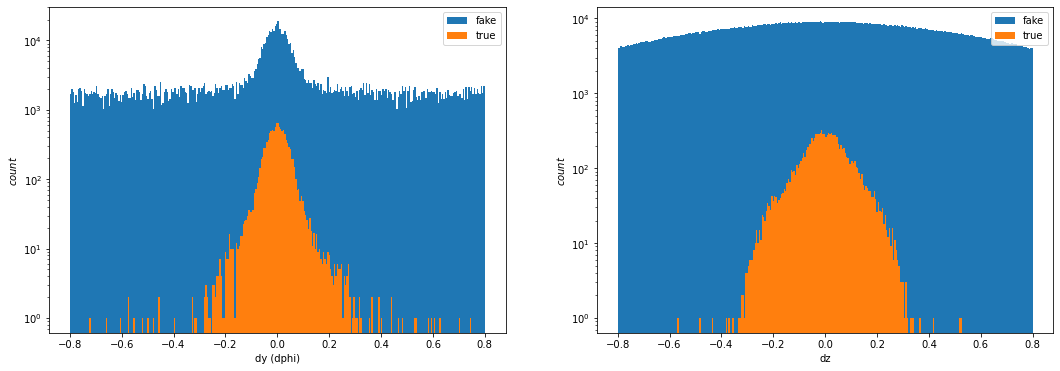

In [69]:
true_nodes = nodes[nodes.track != -1]
fake_nodes = nodes[nodes.track == -1]

plt.figure(figsize=(18,6))

plt.subplot(121)
binning=dict(bins=300, range=(-0.8, 0.8))
plt.hist(fake_nodes.dy, label='fake', log=True, **binning)
plt.hist(true_nodes.dy, label='true', **binning)
#plt.axvline(-0.15, color='yellow', linestyle='dashed', linewidth=3)
#plt.axvline(0.15, color='yellow', linestyle='dashed', linewidth=3)
plt.ylabel('$count$')
plt.xlabel('dy (dphi)')
plt.legend(loc=0)

plt.subplot(122)
binning=dict(bins=300, range=(-0.8, 0.8))
plt.hist(fake_nodes.dz, label='fake', log=True, **binning)
plt.hist(true_nodes.dz, label='true', **binning)
#plt.axvline(-0.15, color='yellow', linestyle='dashed', linewidth=3)
#plt.axvline(0.15, color='yellow', linestyle='dashed', linewidth=3)
plt.ylabel('$count$')
plt.xlabel('dz')
plt.legend(loc=0)

In [70]:
def calc_purity_reduce_factor(df_full, df_filtered, true_label = 'true_superedge', cmp_with=-1):
    assert true_label in df_full and true_label in df_filtered

    return len(df_filtered[df_filtered[true_label] != cmp_with]) / len(df_full[df_full[true_label] != cmp_with]), len(df_full) / len(df_filtered)

In [81]:
def filter_segments(df, dphi_min=-0.33, dphi_max=0.33, dz_min=-0.4, dz_max=0.4):
    return df[
        (df.dy > dphi_min) & (df.dy < dphi_max) &
        (df.dz > dz_min) & (df.dz < dz_max)
    ]


#dphi_minmax = (-0.33, 0.33)
#dz_minmax = (-0.4, 0.4)
segments = nodes
filtered = filter_segments(segments)#, *dphi_minmax, *dz_minmax)

purity_, reduce_ = calc_purity_reduce_factor(segments, filtered, 'track', -1)
print("Initial fake to real ratio is %.6f" % (len(segments) / len(segments[segments.track != -1])))
print("Currently fake to real ratio is %.6f" % (len(filtered) / len(filtered[filtered.track != -1])))
print("Result purity %.3f; segments filtering reduced ratio in %.3f times" % (purity_, reduce_))

Initial fake to real ratio is 224.126593
Currently fake to real ratio is 25.760136
Result purity 0.997; segments filtering reduced ratio in 8.730 times


In [80]:
def apply_edge_restriction(pd_edges_df, RESTRICTION=0.15):
    assert 'weight' in pd_edges_df
    return pd_edges_df[pd_edges_df.weight < RESTRICTION]


filtered = apply_edge_restriction(edges, 0.123)

purity_, reduce_ = calc_purity_reduce_factor(edges, filtered, 'true_superedge', -1)
print("Initial fake to real ratio is %.6f" % (len(edges) / len(edges[edges.true_superedge != -1])))
print("Currently fake to real ratio is %.6f" % (len(filtered) / len(filtered[filtered.true_superedge != -1])))
print("Result purity %.3f; segments filtering reduced ratio in %.3f times" % (purity_, reduce_))

Initial fake to real ratio is 11699.851772
Currently fake to real ratio is 48.405572
Result purity 0.990; segments filtering reduced ratio in 244.241 times


In [90]:
from ariadne.graph_net.graph_utils.graph_prepare_utils import construct_output_graph
from ariadne.graph_net.graph_utils.graph import save_graph
def apply_nodes_restrictions_t(df, a, b):
    return filter_segments(df)

out_dir = "../output/cgem_linegraph_note_100_3/"
os.makedirs(out_dir, exist_ok=True)
s = 0
mumu={}
for mult, multi in events_to_analyze.groupby('mult'):
    if multi.event.nunique() < 100:
        print("skipping with mult %d" % mult)
        continue
    print("doing for events with mult %d. count of events= %d" % (mult, multi.event.nunique()))
    for idx, event in multi.groupby('event'):
         
        #clear_output(wait=True)
        #display("Event #%09d" % idx)
    
        transformer = Compose([
                ConstraintsNormalize(
                    use_global_constraints=False,
                    constraints=stations_constraints
                ),
                ToCylindrical(drop_old=True, cart_columns=('y', 'x'))
            ])
        try:
            event = transformer(event)
        except AssertionError as err:
            print("ASS error %r" % err)
            continue
        G = to_pandas_graph_from_df(event, suffixes=suff_df, compute_is_true_track=True)
        nodes_t, edges_t = get_pd_line_graph(G, apply_nodes_restrictions_t)
        if edges_t.empty:
            print("SKIPPED broken %d event" % idx)
            continue
    
        # here we are filtering out superedges, trying to leave true superedges as much as we can
        edges_filtered = apply_edge_restriction(edges_t, 0.123)
    
        # construct the output graph suitable for the neural network
        out = construct_output_graph(nodes_t, edges_filtered, ['y_p', 'y_c', 'z_p', 'z_c', 'z'],
                                     [np.pi, np.pi, 1., 1., 1.], 'edge_index_p', 'edge_index_c')
        save_graph(out, out_dir+"/graph_%d_m%d" % (idx, event.mult.unique()[0]))
        s+=1
        c = mumu[mult] if mult in mumu else 0
        mumu[mult] = c+1
print("done total saved: %d" % s)
print("amount by mult: %r" % mumu)

doing for events with mult 0. count of events= 100
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); da

ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0, 1]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('So